In [148]:
import numpy as np
from prettytable import PrettyTable
from collections import defaultdict


def read_log_file(log_path, print_pretty_table=False, append_all=False):
    data = defaultdict(list)
    with open(log_path, 'r') as file:
        file.readline()
        for line in file.readlines():
            line = line.strip().split(',')
            video, user, trace = list(map(int, line[:3]))
            qoe_w1, qoe_w2, qoe_w3, qoe, qoe1, qoe2, qoe3 = list(map(float, line[3:]))
            qoe_w1, qoe_w2, qoe_w3 = int(qoe_w1), int(qoe_w2), int(qoe_w3)
            data[(qoe_w1, qoe_w2, qoe_w3)].append([video, user, trace, qoe, qoe1, qoe2, qoe3])
            if append_all:
                data[(-1, -1, -1)].append([video, user, trace, qoe, qoe1, qoe2, qoe3])

    if print_pretty_table:
        for qoe_weight, values in data.items():
            print('On QoE Weight:', qoe_weight)
            pt = PrettyTable()
            pt.field_names = ['video', 'user', 'trace', 'qoe', 'qoe1', 'qoe2', 'qoe3']
            mean_qoe, mean_qoe1, mean_qoe2, mean_qoe3 = 0., 0., 0., 0.
            for value in values:
                pt.add_row(value)
                mean_qoe += value[3]
                mean_qoe1 += value[4]
                mean_qoe2 += value[5]
                mean_qoe3 += value[6]
            mean_qoe /= len(values)
            mean_qoe1 /= len(values)
            mean_qoe2 /= len(values)
            mean_qoe3 /= len(values)
            pt.add_row([-1, -1, -1, mean_qoe, mean_qoe1, mean_qoe2, mean_qoe3])
            print(pt)

    return data


def organize_data(data: dict, print_organized_data=False):
    organized_data = {}
    for qoe_weight, values in data.items():
        organized_data[qoe_weight] = {'qoe': [], 'qoe1': [], 'qoe2': [], 'qoe3': []}
        for value in values:
            organized_data[qoe_weight]['qoe'].append(value[3])
            organized_data[qoe_weight]['qoe1'].append(value[4])
            organized_data[qoe_weight]['qoe2'].append(value[5])
            organized_data[qoe_weight]['qoe3'].append(value[6])
        for key, value in organized_data[qoe_weight].items():
            organized_data[qoe_weight][key] = np.array(value)
    
    if print_organized_data:
        for qoe_weight, values in organized_data.items():
            print('On QoE Weight:', qoe_weight)
            for key, value in values.items():
                print(key, ':', value.tolist(), '\n')
    
    return organized_data

In [149]:
def append_all(data):
    total_qoe, total_qoe1, total_qoe2, total_qoe3 = [], [], [], []
    for key, value in data.items():
        total_qoe.extend(value['qoe'].tolist())
        total_qoe1.extend(value['qoe1'].tolist())
        total_qoe2.extend(value['qoe2'].tolist())
        total_qoe3.extend(value['qoe3'].tolist())
    total_qoe = np.array(total_qoe)
    total_qoe1 = np.array(total_qoe1)
    total_qoe2 = np.array(total_qoe2)
    total_qoe3 = np.array(total_qoe3)
    data[(-1, -1, -1)] = {'qoe': total_qoe, 'qoe1': total_qoe1, 'qoe2': total_qoe2, 'qoe3': total_qoe3}
    return data

# Our Model vs. Baselines

In [150]:
# rlva data
# Wu2017
wu2017_rlva_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/seen_qoe0/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 0
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/seen_qoe1/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_2_ent_0.1_results.csv',  # qoe 1
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/seen_qoe2/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 2
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/seen_qoe3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv'
]
wu2017_rlva_unseen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/unseen_qoe0/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 0
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/unseen_qoe1/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_2_ent_0.1_results.csv',  # qoe 1
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/unseen_qoe2/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 2
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Wu2017_4G/unseen_qoe3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 3
]
# Jin2022
jin2022_rlva_seen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe0/epochs_200_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 0
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe0/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe1/epochs_200_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 1
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe1/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 1
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe1/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe2/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 2
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe3/epochs_200_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv'
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv'
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/seen_qoe3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.05_results.csv',
]
jin2022_rlva_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe0/epochs_200_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 0
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe0/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe1/epochs_200_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 1
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe1/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe1/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 1
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe2/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 2
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe3/epochs_200_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 3
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.1_results.csv',  # qoe 3
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/rlva/Jin2022_4G/unseen_qoe3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.05_results.csv'
]
wu2017_rlva_seen = {}
for wu2017_rlva_seen_fpath in wu2017_rlva_seen_fpaths:
    wu2017_rlva_seen.update(organize_data(read_log_file(wu2017_rlva_seen_fpath, append_all=False, print_pretty_table=False)))
wu2017_rlva_unseen = {}
for wu2017_rlva_unseen_fpath in wu2017_rlva_unseen_fpaths:
    wu2017_rlva_unseen.update(organize_data(read_log_file(wu2017_rlva_unseen_fpath, append_all=False, print_pretty_table=False)))
jin2022_rlva_seen = {}
for jin2022_rlva_seen_fpath in jin2022_rlva_seen_fpaths:
    jin2022_rlva_seen.update(organize_data(read_log_file(jin2022_rlva_seen_fpath, append_all=False, print_pretty_table=False)))
jin2022_rlva_unseen = {}
for jin2022_rlva_unseen_fpath in jin2022_rlva_unseen_fpaths:
    jin2022_rlva_unseen.update(organize_data(read_log_file(jin2022_rlva_unseen_fpath, append_all=False, print_pretty_table=False)))


In [151]:
# paas data
# Wu2017
wu2017_paas_seen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas/Wu2017_4G/seen_qoe0_1_2_3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_tuf_500_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Wu2017_4G/seen_qoe0_1_2_3/epochs_20_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Wu2017_4G/seen_qoe0_1_2_3/epochs_22_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Wu2017_4G/seen_qoe0_1_2_3/epochs_500_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv'
]
wu2017_paas_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas/Wu2017_4G/unseen_qoe0_1_2_3/epochs_100_bs_256_lr_0.0001_gamma_0.99_seed_1_tuf_500_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Wu2017_4G/unseen_qoe0_1_2_3/epochs_20_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Wu2017_4G/unseen_qoe0_1_2_3/epochs_22_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Wu2017_4G/unseen_qoe0_1_2_3/epochs_500_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv'
]
# Jin2022
jin2022_paas_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Jin2022_4G/seen_qoe0_1_2_3/epochs_100_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv'
]
# Jin2022
jin2022_paas_unseen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/paas2/Jin2022_4G/unseen_qoe0_1_2_3/epochs_100_bs_256_lr_0.0001_gamma_0.95_seed_15_tuf_50_results.csv'
]
wu2017_paas_seen = {}
for wu2017_paas_seen_fpath in wu2017_paas_seen_fpaths:
    wu2017_paas_seen.update(organize_data(read_log_file(wu2017_paas_seen_fpath, append_all=False, print_pretty_table=False)))
wu2017_paas_unseen = {}
for wu2017_paas_unseen_fpath in wu2017_paas_unseen_fpaths:
    wu2017_paas_unseen.update(organize_data(read_log_file(wu2017_paas_unseen_fpath, append_all=False, print_pretty_table=False)))
jin2022_paas_seen = {}
for jin2022_paas_seen_fpath in jin2022_paas_seen_fpaths:
    jin2022_paas_seen.update(organize_data(read_log_file(jin2022_paas_seen_fpath, append_all=False, print_pretty_table=False)))
jin2022_paas_unseen = {}
for jin2022_paas_unseen_fpath in jin2022_paas_unseen_fpaths:
    jin2022_paas_unseen.update(organize_data(read_log_file(jin2022_paas_unseen_fpath, append_all=False, print_pretty_table=False)))


In [152]:
# parima data
# Wu2017
wu2017_parima_seen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/seen_qoe0_1_2_3/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/seen_qoe0/seed_1_agg_3.0/results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/seen_qoe1/seed_1_agg_0.5/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/seen_qoe1/seed_1_agg_0.8/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/seen_qoe2/seed_1_agg_1.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/seen_qoe3/seed_1_agg_0.8/results.csv'
]
wu2017_parima_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/unseen_qoe0_1_2_3/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/unseen_qoe0/seed_1_agg_3.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/unseen_qoe1/seed_1_agg_0.5/results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/unseen_qoe1/seed_1_agg_0.6/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/unseen_qoe2/seed_1_agg_1.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Wu2017_4G/unseen_qoe3/seed_1_agg_0.8/results.csv'
]
# Jin2022
jin2022_parima_seen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe0/seed_1_agg_8.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe0/seed_1_agg_5.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe1/seed_1_agg_0.5/results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe2/seed_1_agg_1.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe2/seed_1_agg_2.0/results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe3/seed_1_agg_1.0/results.csv'
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/seen_qoe3/seed_1_agg_2.0/results.csv'
]
jin2022_parima_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/unseen_qoe0/seed_1_agg_8.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/unseen_qoe0/seed_1_agg_5.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/unseen_qoe1/seed_1_agg_0.5/results.csv',
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/unseen_qoe2/seed_1_agg_1.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/unseen_qoe2/seed_1_agg_2.0/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/parima/Jin2022_4G/unseen_qoe3/seed_1_agg_1.0/results.csv',
]
wu2017_parima_seen = {}
for wu2017_parima_seen_fpath in wu2017_parima_seen_fpaths:
    wu2017_parima_seen.update(organize_data(read_log_file(wu2017_parima_seen_fpath, append_all=False, print_pretty_table=False)))
wu2017_parima_unseen = {}
for wu2017_parima_unseen_fpath in wu2017_parima_unseen_fpaths:
    wu2017_parima_unseen.update(organize_data(read_log_file(wu2017_parima_unseen_fpath, append_all=False, print_pretty_table=False)))
jin2022_parima_seen = {}
for jin2022_parima_seen_fpath in jin2022_parima_seen_fpaths:
    jin2022_parima_seen.update(organize_data(read_log_file(jin2022_parima_seen_fpath, append_all=False, print_pretty_table=False)))
jin2022_parima_unseen = {}
for jin2022_parima_unseen_fpath in jin2022_parima_unseen_fpaths:
    jin2022_parima_unseen.update(organize_data(read_log_file(jin2022_parima_unseen_fpath, append_all=False, print_pretty_table=False)))

In [153]:
# gen360 data
# Wu2017
wu2017_gen360_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_666_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv'
]
wu2017_gen360_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360/Wu2017_4G/unseen_qoe0_1_2_3/epochs_2000_bs_512_lr_0.0001_gamma_0.95_seed_1_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_1_bc_True/results.csv'
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_666_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv'
]
# Jin2022
jin2022_gen360_seen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
jin2022_gen360_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
wu2017_gen360_seen = {}
for wu2017_gen360_seen_fpath in wu2017_gen360_seen_fpaths:
    wu2017_gen360_seen.update(organize_data(read_log_file(wu2017_gen360_seen_fpath, append_all=False, print_pretty_table=False)))
wu2017_gen360_unseen = {}
for wu2017_gen360_unseen_fpath in wu2017_gen360_unseen_fpaths:
    wu2017_gen360_unseen.update(organize_data(read_log_file(wu2017_gen360_unseen_fpath, append_all=False, print_pretty_table=False)))
jin2022_gen360_seen = {}
for jin2022_gen360_seen_fpath in jin2022_gen360_seen_fpaths:
    jin2022_gen360_seen.update(organize_data(read_log_file(jin2022_gen360_seen_fpath, append_all=False, print_pretty_table=False)))
jin2022_gen360_unseen = {}
for jin2022_gen360_unseen_fpath in jin2022_gen360_unseen_fpaths:
    jin2022_gen360_unseen.update(organize_data(read_log_file(jin2022_gen360_unseen_fpath, append_all=False, print_pretty_table=False)))

In [154]:
# gen360 w/o RepL data
# Wu2017
wu2017_gen360_wo_repl_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
wu2017_gen360_wo_repl_unseen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
# Jin2022
jin2022_gen360_wo_repl_seen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_500_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_500_bs_512_lr_0.0005_gamma_0.95_seed_666_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv',
]
jin2022_gen360_wo_repl_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_500_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv',
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_500_bs_512_lr_0.0005_gamma_0.95_seed_666_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
wu2017_gen360_wo_repl_seen = {}
for wu2017_gen360_wo_repl_seen_fpath in wu2017_gen360_wo_repl_seen_fpaths:
    wu2017_gen360_wo_repl_seen.update(organize_data(read_log_file(wu2017_gen360_wo_repl_seen_fpath, append_all=False, print_pretty_table=False)))
wu2017_gen360_wo_repl_unseen = {}
for wu2017_gen360_wo_repl_unseen_fpath in wu2017_gen360_wo_repl_unseen_fpaths:
    wu2017_gen360_wo_repl_unseen.update(organize_data(read_log_file(wu2017_gen360_wo_repl_unseen_fpath, append_all=False, print_pretty_table=False)))
jin2022_gen360_wo_repl_seen = {}
for jin2022_gen360_wo_repl_seen_fpath in jin2022_gen360_wo_repl_seen_fpaths:
    jin2022_gen360_wo_repl_seen.update(organize_data(read_log_file(jin2022_gen360_wo_repl_seen_fpath, append_all=False, print_pretty_table=False)))
jin2022_gen360_wo_repl_unseen = {}
for jin2022_gen360_wo_repl_unseen_fpath in jin2022_gen360_wo_repl_unseen_fpaths:
    jin2022_gen360_wo_repl_unseen.update(organize_data(read_log_file(jin2022_gen360_wo_repl_unseen_fpath, append_all=False, print_pretty_table=False)))

In [155]:
wu2017_rlva_seen = append_all(wu2017_rlva_seen)
wu2017_rlva_unseen = append_all(wu2017_rlva_unseen)
jin2022_rlva_seen = append_all(jin2022_rlva_seen)
jin2022_rlva_unseen = append_all(jin2022_rlva_unseen)

In [156]:
wu2017_paas_seen = append_all(wu2017_paas_seen)
wu2017_paas_unseen = append_all(wu2017_paas_unseen)
jin2022_paas_seen = append_all(jin2022_paas_seen)
jin2022_paas_unseen = append_all(jin2022_paas_unseen)

In [157]:
wu2017_parima_seen = append_all(wu2017_parima_seen)
wu2017_parima_unseen = append_all(wu2017_parima_unseen)
jin2022_parima_seen = append_all(jin2022_parima_seen)
jin2022_parima_unseen = append_all(jin2022_parima_unseen)

In [158]:
wu2017_gen360_seen = append_all(wu2017_gen360_seen)
wu2017_gen360_unseen = append_all(wu2017_gen360_unseen)
jin2022_gen360_seen = append_all(jin2022_gen360_seen)
jin2022_gen360_unseen = append_all(jin2022_gen360_unseen)

In [159]:
wu2017_gen360_wo_repl_seen = append_all(wu2017_gen360_wo_repl_seen)
wu2017_gen360_wo_repl_unseen = append_all(wu2017_gen360_wo_repl_unseen)
jin2022_gen360_wo_repl_seen = append_all(jin2022_gen360_wo_repl_seen)
jin2022_gen360_wo_repl_unseen = append_all(jin2022_gen360_wo_repl_unseen)

-1.71899 0.63761 -2.42927 0.75614
Improvement of GEN360
9.161867079275817 6.035183712421738
7.433132623738491 4.251957255990357
3.1494540626040965 3.5474444302118204
0.0 0.0
9.871190431584555 4.0299162574087655
[1 2 3 4 5]


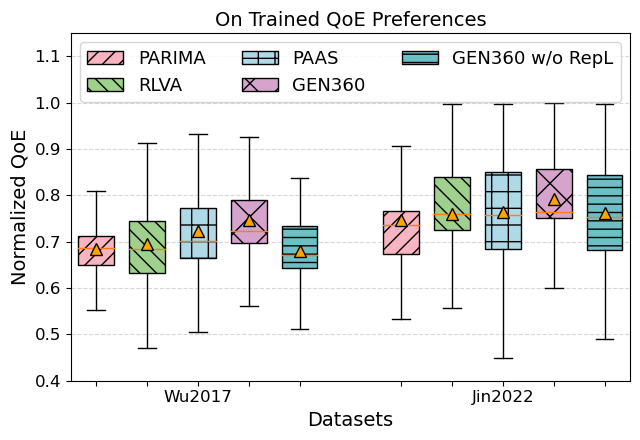

-1.33739 0.38567 -1.34012 0.53427
Improvement of GEN360
9.326817551269087 10.197137777086658
9.731345364342413 8.944948541455453
5.067923485324195 3.4108958881284615
0.0 0.0
9.34981156412864 4.35540700377009
[1 2 3 4 5]


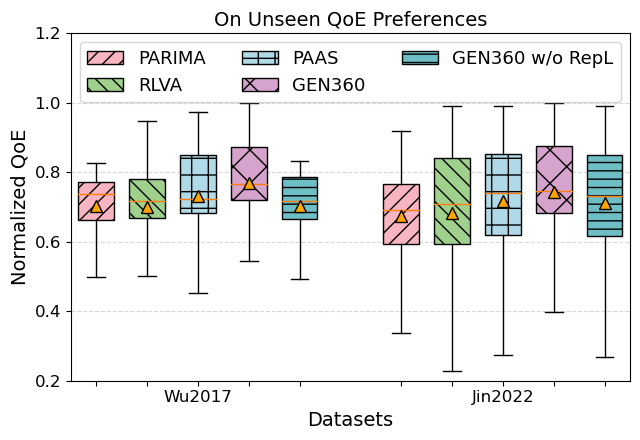

In [255]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator, FixedLocator


def plot_box_overall_qoe(parima_1, rlva_1, paas_1, gen360_1, gen360_wo_repl_1, parima_2, rlva_2, paas_2, gen360_2, gen360_wo_repl_2, save_path=None,
                         min_1=None, max_1=None, min_2=None, max_2=None, title=' ', ylim=[0.2, 1.2]):
    matplotlib.rcParams['hatch.linewidth'] = 1
    data_1 = []
    data_2 = []
    data_1.append(parima_1[-1, -1, -1]['qoe'])
    data_1.append(rlva_1[-1, -1, -1]['qoe'])
    # print(rlva_1[-1, -1, -1]['qoe'])
    data_1.append(paas_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_wo_repl_1[-1, -1, -1]['qoe'])

    data_2.append(parima_2[-1, -1, -1]['qoe'])
    data_2.append(rlva_2[-1, -1, -1]['qoe'])
    data_2.append(paas_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_wo_repl_2[-1, -1, -1]['qoe'])

    # search min, max for normalization
    if min_1 is None:
        min_1, max_1 = np.min(data_1), np.max(data_1)
        min_2, max_2 = np.min(data_2), np.max(data_2)
    print(min_1, max_1, min_2, max_2)

    # normalize
    mean_data_1, mean_data_2 = [], []
    for i in range(len(data_1)):
        data_1[i] = (data_1[i] - min_1) / (max_1 - min_1)
        data_2[i] = (data_2[i] - min_2) / (max_2 - min_2)
        mean_data_1.append(np.mean(data_1[i]))
        mean_data_2.append(np.mean(data_2[i]))
    print('Improvement of GEN360')
    for i in range(len(mean_data_1)):
        print((mean_data_1[-2] - mean_data_1[i]) / mean_data_1[i] * 100, (mean_data_2[-2] - mean_data_2[i]) / mean_data_2[i] * 100)
    plt.figure(figsize=(6.5, 4.5))

    # colors = ['pink', 'lightblue', 'lightgreen', '#D38C80']
    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB', '#6DBEC5']
    xlabels = ['', '', 'Wu2017', '', '']
    hatchs = ['//', '\\\\', '+', 'x', '--']
    widths = [0.7] * len(colors)
    meanprops = dict(marker='^', markersize=8, markeredgecolor='black', markerfacecolor='orange', linewidth=0.0)
    positions = np.arange(1, len(colors) + 1)
    print(positions)

    boxes = plt.boxplot(data_1, notch=False, vert=True, patch_artist=True, showfliers=False, showmeans=True,
                        positions=positions, labels=xlabels, widths=widths, meanprops=meanprops)
    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB', '#6DBEC5']
    xlabels = ['', '', 'Jin2022', '', '']
    hatchs = ['//', '\\\\', '+', 'x', '--']
    boxes = plt.boxplot(data_2, notch=False, vert=True, patch_artist=True, labels=xlabels, showfliers=False,
                      showmeans=True, positions=positions + len(colors) + 1, widths=widths, meanprops=meanprops)

    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    plt.ylim(ylim)
    # plt.ylim([-0.7, 0.7])
    # plt.xticks([1, 2, 3, 4, 6, 7, 8, 9], labels)
    # plt.xticks([2.5,  7.5], labels)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
    plt.ylabel('Normalized QoE', fontsize=14)
    plt.xlabel('Datasets', fontsize=14)
    plt.title(title, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    labels = ['PARIMA', 'RLVA', 'PAAS', 'GEN360', 'GEN360 w/o RepL']
    plt.legend(boxes['boxes'], labels, fontsize=13, ncol=3, loc='upper center')
    # plt.legend(boxes['boxes'], labels, fontsize=12, ncol=4, loc='upper center')
    # plt.savefig("overall_qoe_jin2022.pdf", dpi=300, format="pdf")
    if save_path is not None:
        plt.savefig(save_path, dpi=300, format="pdf")
    plt.show()


plot_box_overall_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, 
                     jin2022_parima_seen, jin2022_rlva_seen, jin2022_paas_seen, jin2022_gen360_seen, jin2022_gen360_wo_repl_seen,
                     save_path='overall_qoe_cmp_trained.pdf', title='On Trained QoE Preferences', ylim=[0.4, 1.15])
plot_box_overall_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, 
                     jin2022_parima_unseen, jin2022_rlva_unseen, jin2022_paas_unseen, jin2022_gen360_unseen, jin2022_gen360_wo_repl_unseen,
                     save_path='overall_qoe_cmp_unseen.pdf', title='On Unseen QoE Preferences', ylim=[0.2, 1.2])

[1 2 3 4 5]


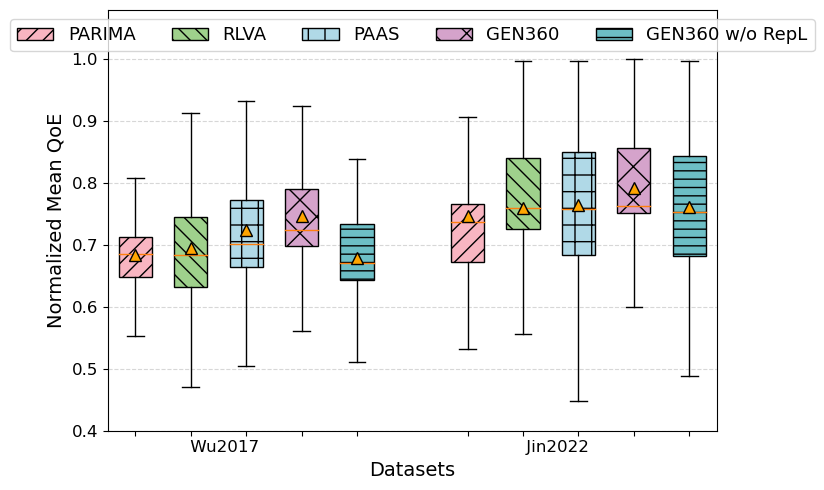

[1 2 3 4 5]


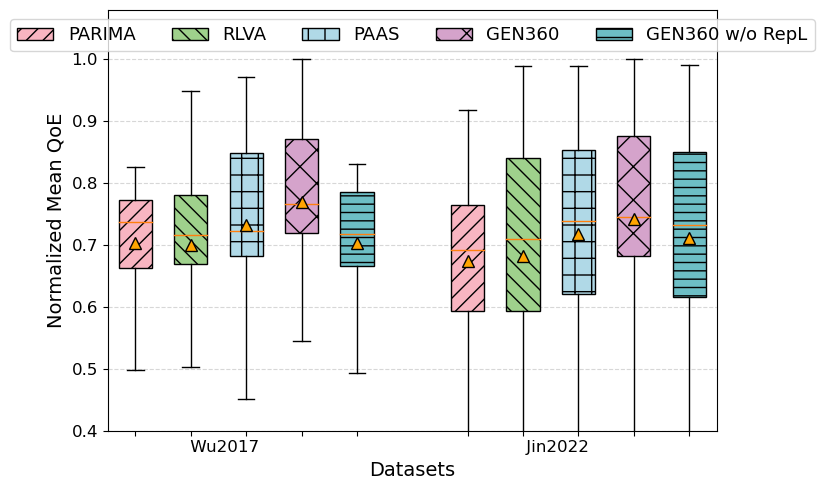

In [254]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def plot_bar_overall_qoe(parima_1, rlva_1, paas_1, gen360_1, gen360_wo_repl_1, parima_2, rlva_2, paas_2, gen360_2, gen360_wo_repl_2, save_path=None,
                         ):
    matplotlib.rcParams['hatch.linewidth'] = 1
    data_1 = []
    data_2 = []
    data_1.append(parima_1[-1, -1, -1]['qoe'])
    data_1.append(rlva_1[-1, -1, -1]['qoe'])
    # print(rlva_1[-1, -1, -1]['qoe'])
    data_1.append(paas_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_wo_repl_1[-1, -1, -1]['qoe'])

    data_2.append(parima_2[-1, -1, -1]['qoe'])
    data_2.append(rlva_2[-1, -1, -1]['qoe'])
    data_2.append(paas_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_wo_repl_2[-1, -1, -1]['qoe'])

    # search min, max for normalization
    min_1, max_1 = np.min(data_1), np.max(data_1)
    min_2, max_2 = np.min(data_2), np.max(data_2)

    # normalize
    for i in range(len(data_1)):
        data_1[i] = (data_1[i] - min_1) / (max_1 - min_1)
        data_2[i] = (data_2[i] - min_2) / (max_2 - min_2)

    plt.figure(figsize=(7, 5))

    # colors = ['pink', 'lightblue', 'lightgreen', '#D38C80']
    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB', '#6DBEC5']
    xlabels = ['', '             Wu2017', '', '', '']
    hatchs = ['//', '\\\\', '+', 'x', '--']
    widths = [0.6] * len(colors)
    meanprops = dict(marker='^', markersize=8, markeredgecolor='black', markerfacecolor='orange', linewidth=0.0)
    positions = np.arange(1, len(colors) + 1)
    print(positions)

    boxes = plt.boxplot(data_1, notch=False, vert=True, patch_artist=True, showfliers=False, showmeans=True,
                        positions=positions, labels=xlabels, widths=widths, meanprops=meanprops)
    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB', '#6DBEC5']
    xlabels = ['', '             Jin2022', '', '', '']
    hatchs = ['//', '\\\\', '+', 'x', '--']
    boxes = plt.boxplot(data_2, notch=False, vert=True, patch_artist=True, labels=xlabels, showfliers=False,
                      showmeans=True, positions=positions + len(colors) + 1, widths=widths, meanprops=meanprops)

    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    plt.ylim([0.4, 1.08])
    # plt.ylim([-0.7, 0.7])
    # plt.xticks([1, 2, 3, 4, 6, 7, 8, 9], labels)
    # plt.xticks([2.5,  7.5], labels)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Normalized Mean QoE', fontsize=14)
    plt.xlabel('Datasets', fontsize=14)
    # plt.title('Average QoE')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    labels = ['PARIMA', 'RLVA', 'PAAS', 'GEN360', 'GEN360 w/o RepL']
    plt.legend(boxes['boxes'], labels, fontsize=13, ncol=5, loc='upper center')
    # plt.legend(boxes['boxes'], labels, fontsize=12, ncol=4, loc='upper center')
    # plt.savefig("overall_qoe_jin2022.pdf", dpi=300, format="pdf")
    if save_path is not None:
        plt.savefig(save_path, dpi=300, format="pdf")
    plt.show()


plot_bar_overall_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, 
                     jin2022_parima_seen, jin2022_rlva_seen, jin2022_paas_seen, jin2022_gen360_seen, jin2022_gen360_wo_repl_seen)
plot_bar_overall_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, 
                     jin2022_parima_unseen, jin2022_rlva_unseen, jin2022_paas_unseen, jin2022_gen360_unseen, jin2022_gen360_wo_repl_unseen)

In [ ]:
def plot_box_individual_qoe(parima, rlva, paas, gen360, gen360_wo_repl, qoe_weight):
    data_qoe = []
    data_qoe1 = []
    data_qoe2 = []
    data_qoe3 = []

    data_qoe.append(parima[qoe_weight]['qoe'])
    data_qoe.append(rlva[qoe_weight]['qoe'])
    data_qoe.append(paas[qoe_weight]['qoe'])
    data_qoe.append(gen360[qoe_weight]['qoe'])
    data_qoe.append(gen360_wo_repl[qoe_weight]['qoe'])

    data_qoe1.append(parima[qoe_weight]['qoe1'])
    data_qoe1.append(rlva[qoe_weight]['qoe1'])
    data_qoe1.append(paas[qoe_weight]['qoe1'])
    data_qoe1.append(gen360[qoe_weight]['qoe1'])
    data_qoe1.append(gen360_wo_repl[qoe_weight]['qoe1'])

    data_qoe2.append(parima[qoe_weight]['qoe2'])
    data_qoe2.append(rlva[qoe_weight]['qoe2'])
    data_qoe2.append(paas[qoe_weight]['qoe2'])
    data_qoe2.append(gen360[qoe_weight]['qoe2'])
    data_qoe2.append(gen360_wo_repl[qoe_weight]['qoe2'])

    data_qoe3.append(parima[qoe_weight]['qoe3'])
    data_qoe3.append(rlva[qoe_weight]['qoe3'])
    data_qoe3.append(paas[qoe_weight]['qoe3'])
    data_qoe3.append(gen360[qoe_weight]['qoe3'])
    data_qoe3.append(gen360_wo_repl[qoe_weight]['qoe3'])

    # search min, max for normalization
    min_, max_ = np.min(data_qoe), np.max(data_qoe)
    min_1, max_1 = np.min(data_qoe1), np.max(data_qoe1)
    min_2, max_2 = np.min(data_qoe2), np.max(data_qoe2)
    min_3, max_3 = np.min(data_qoe3), np.max(data_qoe3)

    # normalize
    # for i in range(len(data_qoe1)):
    #     data_qoe[i] = (data_qoe[i] - min_) / (max_ - min_)
    #     data_qoe1[i] = (data_qoe1[i] - min_1) / (max_1 - min_1)
    #     data_qoe2[i] = (data_qoe2[i] - min_2) / (max_2 - min_2)
    #     data_qoe3[i] = (data_qoe3[i] - min_3) / (max_3 - min_3)

    plt.figure(figsize=(8, 5))

    # colors = ['pink', 'lightblue', 'lightgreen', '#D38C80']
    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB']
    xlabels = ['', '   Overall QoE', '', '']
    hatchs = ['//', '\\\\', '+', 'x']
    widths = [0.5] * 4
    meanprops = dict(marker='^', markersize=8, markeredgecolor='black', markerfacecolor='orange', linewidth=0.0)
    positions = np.arange(1, 5)
    print(positions)

    boxes = plt.boxplot(data_qoe, notch=False, vert=True, patch_artist=True, showfliers=False, showmeans=True,
                        positions=positions, labels=xlabels, widths=widths, meanprops=meanprops)
    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    # colors = ['pink', 'lightblue', 'lightgreen', '#D38C80']
    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB']
    xlabels = ['', '   Viewport Quality', '', '']
    hatchs = ['//', '\\\\', '+', 'x']
    widths = [0.5] * 4
    meanprops = dict(marker='^', markersize=8, markeredgecolor='black', markerfacecolor='orange', linewidth=0.0)
    positions = np.arange(1, 5)
    print(positions)

    boxes = plt.boxplot(data_qoe1, notch=False, vert=True, patch_artist=True, showfliers=False, showmeans=True,
                        positions=positions + 5 * 1, labels=xlabels, widths=widths, meanprops=meanprops)
    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB']
    xlabels = ['', '    Rebuffering', '', '']
    hatchs = ['//', '\\\\', '+', 'x']
    boxes = plt.boxplot(data_qoe2, notch=False, vert=True, patch_artist=True, labels=xlabels, showfliers=False,
                      showmeans=True, positions=positions + 5 * 2, widths=widths, meanprops=meanprops)

    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB']
    xlabels = ['', '    Quality Smoothness', '', '']
    hatchs = ['//', '\\\\', '+', 'x']
    boxes = plt.boxplot(data_qoe3, notch=False, vert=True, patch_artist=True, labels=xlabels, showfliers=False,
                      showmeans=True, positions=positions + 5 * 3, widths=widths, meanprops=meanprops)

    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    # plt.ylim([0, 1])
    # plt.xticks([1, 2, 3, 4, 6, 7, 8, 9], labels)
    # plt.xticks([2.5,  7.5], labels)
    plt.xticks(fontsize=11.5)
    plt.yticks(fontsize=12)
    plt.ylabel('Normalized Mean Scores', fontsize=14)
    plt.title(f'QoE Weight {qoe_weight}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    labels = ['PARIMA', 'RLVA', 'PAAS', 'GEN360']
    plt.legend(boxes['boxes'], labels, fontsize=14, bbox_to_anchor=(0.55, 1),)
    plt.savefig(f"individual_qoe_jin2022{'_'.join(map(str, qoe_weight))}.pdf", dpi=300, format="pdf")
    plt.show()

plot_box_individual_qoe(parima_seen, rlva_seen, paas_seen, gen360_seen, (7, 1, 1))
plot_box_individual_qoe(parima_seen, rlva_seen, paas_seen, gen360_seen, (1, 7, 1))
plot_box_individual_qoe(parima_seen, rlva_seen, paas_seen, gen360_seen, (1, 1, 7))
plot_box_individual_qoe(parima_seen, rlva_seen, paas_seen, gen360_seen, (3, 3, 3))

plot_box_individual_qoe(parima_unseen, rlva_unseen, paas_unseen, gen360_unseen, (5, 1, 3))
plot_box_individual_qoe(parima_unseen, rlva_unseen, paas_unseen, gen360_unseen, (2, 4, 3))
plot_box_individual_qoe(parima_unseen, rlva_unseen, paas_unseen, gen360_unseen, (1, 3, 5))
plot_box_individual_qoe(parima_unseen, rlva_unseen, paas_unseen, gen360_unseen, (4, 4, 1))

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22]
[0.35410895349775423, 0.8007091435589864, 0.776040125781089, 0.8366285871816251, 0.37861071515021116, 0.4466212274461226, 0.8660445054341445, 0.8390717159319493, 0.9180159690732976, 0.15669712363483457, 0.6592997759172956, 0.7902876300848215, 0.7911300882583411, 0.6159318678599414, 0.28432898915329735, 0.49053963460605843, 0.2994087717367827, 0.2988225187702833, 0.36636225661799376, 0.056191646391908025]
[0.14384873378966942, 0.11045009180702572, 0.12357570480548195, 0.11913277660199033, 0.07513200829315325, 0.09168052297109154, 0.05056846289547471, 0.06266126870004958, 0.04643433235276893, 0.06349330515717683, 0.06977030780662846, 0.13058841093615126, 0.13239536106934507, 0.125776685909058, 0.11520943623325487, 0.18362644145391332, 0.2572875963022487, 0.25499906256970417, 0.25281497714660833, 0.022768722672663357]


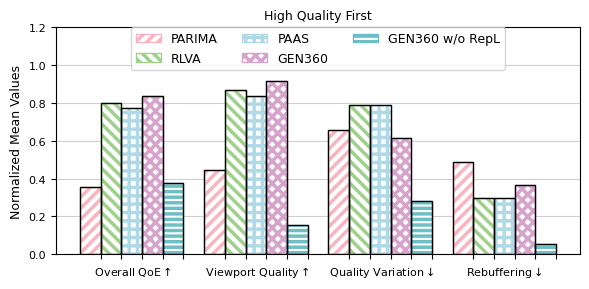

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22]
[0.8462855325495702, 0.7619779785927356, 0.8341568208847555, 0.8751837554346767, 0.8304637996919538, 0.8022486088499828, 0.7440628697501047, 0.8798852885051645, 0.82652520528081, 0.5091635474214239, 0.915282262764852, 0.7974743115648181, 0.9251265510408063, 0.8473021562660437, 0.5677973484425727, 0.4293074436764928, 0.4889057756937733, 0.44192745093256836, 0.41550425913335637, 0.2326559852967928]
[0.17014261598615035, 0.2727771008479075, 0.17557006532651245, 0.17082394954034638, 0.1851667664722788, 0.02457227349961555, 0.005504332623345501, 0.06028881114162789, 0.0578556845141021, 0.21122769531990118, 0.031709552906503964, 0.0036869846893608045, 0.04242022230526469, 0.02901839216973811, 0.2355520655939814, 0.11440512304674813, 0.18300817137228984, 0.11647521455369861, 0.11354664547868555, 0.09651788276183763]


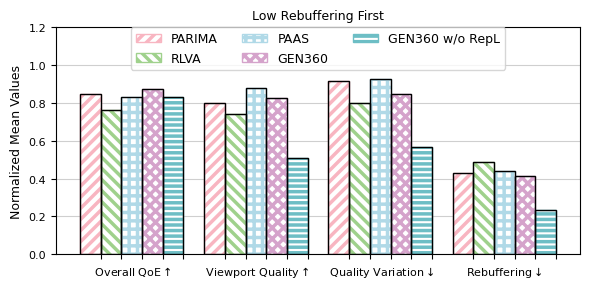

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22]
[0.33307092362706686, 0.7231247003983668, 0.6531325933517365, 0.7675297948658611, 0.4069313354381208, 0.5321535373497434, 0.8932225934477338, 0.8078785684935527, 0.916945697262606, 0.1371350793433385, 0.7417471724478485, 0.841854732374093, 0.8301561129234761, 0.7467597408055305, 0.2209056309394355, 0.5391699039173387, 0.35249928355927745, 0.33944646330364087, 0.37658006689433554, 0.05579132867912212]
[0.13631638344374225, 0.13917933874810046, 0.16006610883644262, 0.1574342338017307, 0.08930036589768502, 0.07892504214486526, 0.04353288938463914, 0.07688202007893478, 0.047590781923679236, 0.05285385794228041, 0.053322006946474404, 0.09980228515496066, 0.09697341767807, 0.09439892290436955, 0.0851402492508195, 0.1793413226193065, 0.25128351586537867, 0.24450955461140533, 0.2500640420408407, 0.021502791076779562]


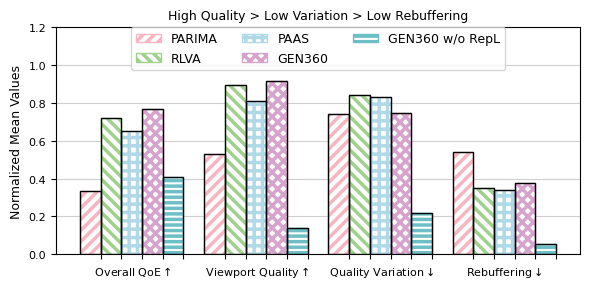

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22]
[0.6773846371882085, 0.6893874716553287, 0.7416519274376417, 0.8644628684807256, 0.6729523809523809, 0.7565546162990359, 0.6988079090591969, 0.8005939075893508, 0.6560735718954581, 0.3370553630757039, 0.9108739059617724, 0.7277395109698183, 0.8531324816515561, 0.6879780897994426, 0.3906040268456376, 0.3642315693219265, 0.44327895818082785, 0.3473987332490394, 0.31618200718224015, 0.12264771777789281]
[0.14182621586795668, 0.2534979686407141, 0.17195365972286286, 0.1660314305583431, 0.17240531367626782, 0.046384462876136255, 0.00527298975990847, 0.08343527078858873, 0.05756224845339131, 0.12874826570218023, 0.05621353213841136, 0.009188193582106397, 0.05357578278646306, 0.019377853993111784, 0.14920276174738825, 0.13758399216087389, 0.20622091669020498, 0.14479325637731214, 0.13463432086894117, 0.04684892360750692]


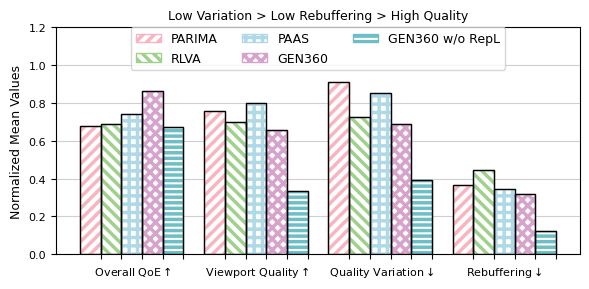

In [252]:
import matplotlib
import matplotlib.pyplot as plt

def plot_bar_individual_qoe(parima, rlva, paas, gen360, gen360_wo_repl, qoe_weight, title=None):
    data_qoe = []
    data_qoe1 = []
    data_qoe2 = []
    data_qoe3 = []

    data_qoe.append(parima[qoe_weight]['qoe'])
    data_qoe.append(rlva[qoe_weight]['qoe'])
    data_qoe.append(paas[qoe_weight]['qoe'])
    data_qoe.append(gen360[qoe_weight]['qoe'])
    data_qoe.append(gen360_wo_repl[qoe_weight]['qoe'])

    data_qoe1.append(parima[qoe_weight]['qoe1'])
    data_qoe1.append(rlva[qoe_weight]['qoe1'])
    data_qoe1.append(paas[qoe_weight]['qoe1'])
    data_qoe1.append(gen360[qoe_weight]['qoe1'])
    data_qoe1.append(gen360_wo_repl[qoe_weight]['qoe'])

    data_qoe2.append(parima[qoe_weight]['qoe2'])
    data_qoe2.append(rlva[qoe_weight]['qoe2'])
    data_qoe2.append(paas[qoe_weight]['qoe2'])
    data_qoe2.append(gen360[qoe_weight]['qoe2'])
    data_qoe2.append(gen360_wo_repl[qoe_weight]['qoe'])

    data_qoe3.append(parima[qoe_weight]['qoe3'])
    data_qoe3.append(rlva[qoe_weight]['qoe3'])
    data_qoe3.append(paas[qoe_weight]['qoe3'])
    data_qoe3.append(gen360[qoe_weight]['qoe3'])
    data_qoe3.append(gen360_wo_repl[qoe_weight]['qoe'])

    data_qoe2, data_qoe3 = data_qoe3, data_qoe2  # switch positions of rebuffering and quality variation to be aligned with the paper

    # search min, max for normalization
    min_, max_ = np.min(data_qoe), np.max(data_qoe)
    min_1, max_1 = np.min(data_qoe1), np.max(data_qoe1)
    min_2, max_2 = np.min(data_qoe2), np.max(data_qoe2)
    min_3, max_3 = np.min(data_qoe3), np.max(data_qoe3)

    # normalize
    for i in range(len(data_qoe1)):
        data_qoe[i] = (data_qoe[i] - min_) / (max_ - min_)
        data_qoe1[i] = (data_qoe1[i] - min_1) / (max_1 - min_1)
        data_qoe2[i] = (data_qoe2[i] - min_2) / (max_2 - min_2)
        data_qoe3[i] = (data_qoe3[i] - min_3) / (max_3 - min_3)
    matplotlib.rcParams['hatch.linewidth'] = 2.5
    # fig, ax = plt.subplots(figsize=(8, 5))
    fig, ax = plt.subplots(figsize=(6, 3))
    width = 1
    qoe_num = 4
    method_num = 5
    x = []
    for i in range(qoe_num):
        for j in range(i + method_num * i, i + method_num * (i + 1)):
            x.append(j)
    print(x)
    total_data = []
    total_data_std = []
    tmp_data = [data_qoe, data_qoe1, data_qoe2, data_qoe3]
    for i in range(len(tmp_data)):
        for j in range(len(tmp_data[i])):
            total_data.append(np.mean(tmp_data[i][j]))
            total_data_std.append(np.std(tmp_data[i][j]))
            # total_data.append(np.mean(data_qoe1[i]))
            # total_data.append(np.mean(data_qoe2[i]))
            # total_data.append(np.mean(data_qoe3[i]))
    print(total_data)
    print(total_data_std)
    # data = [82.33797, 75.22432, 84.77188, 80.07726]
    colors = ['#6DBEC5', '#B9BB37', '#6DBEC5', '#B9BB37'] * qoe_num
    # colors = ['#41644A', '#2A3990', '#41644A', '#2A3990']
    colors = ['#F8B5C1', '#9FD18C', '#B0D9E7', '#D5A3CB', '#6DBEC5'] * qoe_num
    hatchs = ['///', '\\\\\\', '++', 'xxx', '---'] * qoe_num
    # hatchs = ['////', '\\\\\\\\', '+++', 'xxx'] * method_num
    labels = ['PARIMA', 'RLVA', 'PAAS', 'GEN360', 'GEN360 w/o RepL'
              '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
    assert len(total_data) == len(x) == len(labels) == len(hatchs) == len(colors), (len(total_data), len(x), len(labels), len(hatchs), len(colors))
    for i in range(len(x)):
        ax.bar(x[i] - 0.5 * width, total_data[i], width, color='white', edgecolor=colors[i],
                        hatch=hatchs[i], zorder=100, lw=1., label=labels[i])
        # ax.bar(x[i] - 0.5 * width, total_data[i], width, color=colors[i], zorder=100, lw=1., edgecolor='black', label=labels[i])
        # ax.bar(x[i] - 0.5 * width, total_data[i], width, color='none', edgecolor='white',
        #                 hatch=hatchs[i], zorder=200, lw=1.)
        ax.bar(x[i] - 0.5 * width, total_data[i], width, color='none', edgecolor='black', zorder=200, lw=1., )
        # ax.errorbar(x[i] - 0.5 * width, total_data[i], yerr=total_data_std[i], color='black', lw=1., capsize=4, zorder=200)
        # ax.text(x[i] - 0.85 * width, data[i] + 1, '%.2f' % data[i], fontsize=12)
        # ax.text(x[i] - 0.85 * width, total_data[i] + 1, '%.1f' % total_data[i], fontsize=12)
    # xlabels = ['', '          On Trained Viewing Patterns', '', '', '',
    #            '', '            On Unseen Viewing Patterns', '', '', '']
    # xlabels = ['              Overall QoE$\\uparrow$', '', '', '','',
    #            '             Viewport\n              Quality$\\uparrow$', '', '', '', '',
    #            '              Rebuffering$\\downarrow$', '', '', '', '',
    #            '            Quality\n              Variation$\\downarrow$', '', '', '','',]
    xlabels = ['              Overall QoE$\\uparrow$', '', '', '','',
               '             Viewport\n              Quality$\\uparrow$', '', '', '', '',
               '            Quality\n              Variation$\\downarrow$', '', '', '','',
               '              Rebuffering$\\downarrow$', '', '', '', '',]
    xlabels = ['', '       Overall QoE$\\uparrow$', '', '','',
               '', '       Viewport Quality$\\uparrow$', '', '', '',
               '', '       Quality Variation$\\downarrow$', '', '','',
               '', '      Rebuffering$\\downarrow$', '', '', '',]
    # xlabels = ['        Overall QoE', '', '', '',
    #            '       Viewport Quality', '', '', '', 
    #            '       Rebuffering Time', '', '', '', 
    #            '       Smoothness Penalty', '', '', '',]
    ax.set_xticks(x)
    # ax.set_xticklabels(xlabels, rotation=5)  # 14
    ax.set_xticklabels(xlabels, rotation=0)  # 14
    ax.set_ylim([0, 1.2])
    # ax.set_yticks([14, 15, 16, 17, 18])
    ax.set_ylabel('Normalized Mean Values', fontsize=9)
    # ax.set_xlabel(' ', fontsize=14)
    # ax.legend(loc='upper right', fontsize=14, ncol=2, borderaxespad=0)  # 14
    ax.legend(loc='upper center', fontsize=9, ncol=3, borderaxespad=0)  # 14
    ax.grid(axis='y', alpha=0.6, zorder=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    if title is None:
        title = f'QoE Preference {qoe_weight}'
    plt.title(title, fontsize=9)
    plt.tight_layout()
    save_dir = ''
    # plt.savefig(f"individual_qoe_jin2022_{'_'.join(map(str, qoe_weight))}.pdf", dpi=300, format="pdf")
    plt.savefig(f"individual_qoe_{'_'.join(map(str, qoe_weight))}.pdf", dpi=300, format="pdf")
    # save_path = save_dir + 'motivation_accuracy_seen_unseen.pdf'
    # if save_path is not None:
    #     plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()
    

# plot_bar_individual_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, (7, 1, 1), title='On Trained QoE Preference ($\\frac{7}{9}$, $\\frac{1}{9}$, $\\frac{1}{9}$)')
# plot_bar_individual_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, (1, 7, 1), title='On Trained QoE Preference ($\\frac{1}{9}$, $\\frac{1}{9}$, $\\frac{7}{9}$)')
plot_bar_individual_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, (7, 1, 1), title='High Quality First')
plot_bar_individual_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, (1, 7, 1), title='Low Rebuffering First')
# plot_bar_individual_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, (1, 1, 7), title='QoE Preference ($\\frac{1}{9}$, $\\frac{7}{9}$, $\\frac{1}{9}$)')
# plot_bar_individual_qoe(wu2017_parima_seen, wu2017_rlva_seen, wu2017_paas_seen, wu2017_gen360_seen, wu2017_gen360_wo_repl_seen, (3, 3, 3), title='QoE Preference ($\\frac{3}{9}$, $\\frac{3}{9}$, $\\frac{3}{9}$)')

# plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (5, 1, 3), title='On Unseen QoE Preference ($\\frac{5}{9}$, $\\frac{1}{3}$, $\\frac{1}{9}$)')
plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (5, 1, 3), title='High Quality > Low Variation > Low Rebuffering')
# plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (2, 4, 3), title='QoE Preference ($\\frac{2}{9}$, $\\frac{3}{9}$, $\\frac{4}{9}$)')
# plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (1, 3, 5), title='On Unseen QoE Preference ($\\frac{1}{9}$, $\\frac{5}{9}$, $\\frac{1}{3}$)')
# plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (4, 4, 1), title='On Unseen QoE Preference ($\\frac{4}{9}$, $\\frac{1}{9}$, $\\frac{4}{9}$)')
plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (1, 3, 5), title='Low Variation > Low Rebuffering > High Quality')
# plot_bar_individual_qoe(wu2017_parima_unseen, wu2017_rlva_unseen, wu2017_paas_unseen, wu2017_gen360_unseen, wu2017_gen360_wo_repl_unseen, (4, 4, 1), title='On Unseen QoE Preference ($\\frac{4}{9}$, $\\frac{1}{9}$, $\\frac{4}{9}$)')

# Ablation Study

In [ ]:
# gen360 data
# Wu2017
gen360_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_666_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv'
]
gen360_unseen_fpaths = [
    # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360/Wu2017_4G/unseen_qoe0_1_2_3/epochs_2000_bs_512_lr_0.0001_gamma_0.95_seed_1_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_1_bc_True/results.csv'
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_666_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv'
]
# Jin2022
# gen360_seen_fpaths = [
#     # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
#     '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
# ]
# gen360_unseen_fpaths = [
#     # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
#     '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
# ]
gen360_seen = {}
for gen360_seen_fpath in gen360_seen_fpaths:
    gen360_seen.update(organize_data(read_log_file(gen360_seen_fpath, append_all=True, print_pretty_table=True)))
gen360_unseen = {}
for gen360_unseen_fpath in gen360_unseen_fpaths:
    gen360_unseen.update(organize_data(read_log_file(gen360_unseen_fpath, append_all=False, print_pretty_table=False)))

In [ ]:
# gen360 w/o RepL data
# Wu2017
gen360_wo_repl_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
gen360_wo_repl_unseen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
# Jin2022
# gen360_seen_fpaths = [
#     # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
#     '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
# ]
# gen360_unseen_fpaths = [
#     # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
#     '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
# ]
gen360_wo_repl_seen = {}
for gen360_wo_repl_seen_fpath in gen360_wo_repl_seen_fpaths:
    gen360_wo_repl_seen.update(organize_data(read_log_file(gen360_wo_repl_seen_fpath, append_all=False, print_pretty_table=True)))
gen360_wo_repl_unseen = {}
for gen360_wo_repl_unseen_fpath in gen360_wo_repl_unseen_fpaths:
    gen360_wo_repl_unseen.update(organize_data(read_log_file(gen360_wo_repl_unseen_fpath, append_all=False, print_pretty_table=True)))

In [ ]:
# gen360 w/o BC data
# Wu2017
gen360_wo_bc_seen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
gen360_wo_bc_unseen_fpaths = [
    '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
]
# Jin2022
# gen360_seen_fpaths = [
#     # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
#     '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/seen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
# ]
# gen360_unseen_fpaths = [
#     # '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results.csv',
#     '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Jin2022_4G/unseen_qoe0_1_2_3/epochs_1000_bs_512_lr_0.0005_gamma_0.95_seed_5_ent_0.02_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results.csv'
# ]
gen360_wo_bc_seen = {}
for gen360_wo_bc_seen_fpath in gen360_wo_bc_seen_fpaths:
    gen360_wo_bc_seen.update(organize_data(read_log_file(gen360_wo_bc_seen_fpath, append_all=False, print_pretty_table=True)))
gen360_wo_bc_unseen = {}
for gen360_wo_bc_unseen_fpath in gen360_wo_bc_unseen_fpaths:
    gen360_wo_bc_unseen.update(organize_data(read_log_file(gen360_wo_bc_unseen_fpath, append_all=False, print_pretty_table=True)))

In [ ]:
gen360_seen = append_all(gen360_seen)
gen360_unseen = append_all(gen360_unseen)

In [ ]:
gen360_wo_repl_seen = append_all(gen360_wo_repl_seen)
gen360_wo_repl_unseen = append_all(gen360_wo_repl_unseen)

In [ ]:
gen360_wo_bc_seen = append_all(gen360_wo_bc_seen)
gen360_wo_bc_unseen = append_all(gen360_wo_bc_unseen)

In [ ]:
print(gen360_seen[-1, -1, -1])

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def plot_box_overall_qoe(gen360_1, gen360_wo_repl_1, gen360_wo_bc_1, gen360_2, gen360_wo_repl_2, gen360_wo_bc_2):
    matplotlib.rcParams['hatch.linewidth'] = 1
    data_1 = []
    data_2 = []
    data_1.append(gen360_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_wo_repl_1[-1, -1, -1]['qoe'])
    # print(rlva_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_wo_bc_1[-1, -1, -1]['qoe'])

    data_2.append(gen360_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_wo_repl_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_wo_bc_2[-1, -1, -1]['qoe'])

    # search min, max for normalization
    min_1, max_1 = np.min(data_1), np.max(data_1)
    min_2, max_2 = np.min(data_2), np.max(data_2)

    # normalize
    # for i in range(len(data_1)):
    #     data_1[i] = (data_1[i] - min_1) / (max_1 - min_1)
    #     data_2[i] = (data_2[i] - min_2) / (max_2 - min_2)

    plt.figure(figsize=(7, 5))

    # colors = ['pink', 'lightblue', 'lightgreen', '#D38C80']
    colors = ['#D5A3CB', '#F8B5C1', '#9FD18C', ]
    xlabels = ['', '              On Trained QoE Preferences', '']
    hatchs = ['x', '//', '\\\\']
    widths = [0.6] * 3
    meanprops = dict(marker='^', markersize=8, markeredgecolor='black', markerfacecolor='orange', linewidth=0.0)
    positions = np.arange(1, 4)
    print(positions)

    boxes = plt.boxplot(data_1, notch=False, vert=True, patch_artist=True, showfliers=False, showmeans=True,
                        positions=positions, labels=xlabels, widths=widths, meanprops=meanprops)
    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    colors = ['#D5A3CB', '#F8B5C1', '#9FD18C', ]
    xlabels = ['', '              On Unseen QoE Preferences', '']
    hatchs = ['x', '//', '\\\\']
    boxes = plt.boxplot(data_2, notch=False, vert=True, patch_artist=True, labels=xlabels, showfliers=False,
                      showmeans=True, positions=positions + 5, widths=widths, meanprops=meanprops)

    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    # plt.ylim([0.4, 1.08])
    # plt.ylim([-0.7, 0.7])
    # plt.xticks([1, 2, 3, 4, 6, 7, 8, 9], labels)
    # plt.xticks([2.5,  7.5], labels)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Normalized Mean QoE', fontsize=14)
    # plt.title('Average QoE')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    labels = ['GEN360', 'GEN360 w/o RepL', 'GEN360 w/o BC']
    plt.legend(boxes['boxes'], labels, fontsize=13, ncol=4, loc='upper center')
    # plt.legend(boxes['boxes'], labels, fontsize=12, ncol=4, loc='upper center')
    # plt.savefig("overall_qoe_jin2022.pdf", dpi=300, format="pdf")
    plt.savefig("ablation_overall_qoe.pdf", dpi=300, format="pdf")
    plt.show()


plot_box_overall_qoe(gen360_seen, gen360_wo_repl_seen, gen360_wo_bc_seen, gen360_unseen, gen360_wo_repl_unseen, gen360_wo_bc_unseen)

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def plot_box_overall_qoe(gen360_1, gen360_wo_repl_1, gen360_2, gen360_wo_repl_2):
    matplotlib.rcParams['hatch.linewidth'] = 1
    data_1 = []
    data_2 = []
    data_1.append(gen360_1[-1, -1, -1]['qoe'])
    data_1.append(gen360_wo_repl_1[-1, -1, -1]['qoe'])
    # print(rlva_1[-1, -1, -1]['qoe'])

    data_2.append(gen360_2[-1, -1, -1]['qoe'])
    data_2.append(gen360_wo_repl_2[-1, -1, -1]['qoe'])

    # search min, max for normalization
    min_1, max_1 = np.min(data_1), np.max(data_1)
    min_2, max_2 = np.min(data_2), np.max(data_2)

    # normalize
    # for i in range(len(data_1)):
    #     data_1[i] = (data_1[i] - min_1) / (max_1 - min_1)
    #     data_2[i] = (data_2[i] - min_2) / (max_2 - min_2)

    plt.figure(figsize=(7, 5))

    # colors = ['pink', 'lightblue', 'lightgreen', '#D38C80']
    colors = ['#D5A3CB', '#F8B5C1', ]
    xlabels = ['              On Trained QoE Preferences', '']
    hatchs = ['x', 'v',]
    widths = [0.6] * 2
    meanprops = dict(marker='^', markersize=8, markeredgecolor='black', markerfacecolor='orange', linewidth=0.0)
    positions = np.arange(1, 3)
    print(positions)

    boxes = plt.boxplot(data_1, notch=False, vert=True, patch_artist=True, showfliers=False, showmeans=True,
                        positions=positions, labels=xlabels, widths=widths, meanprops=meanprops)
    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    colors = ['#D5A3CB', '#F8B5C1', ]
    xlabels = ['              On Unseen QoE Preferences', '']
    hatchs = ['x', 'v',]
    boxes = plt.boxplot(data_2, notch=False, vert=True, patch_artist=True, labels=xlabels, showfliers=False,
                      showmeans=True, positions=positions + 5, widths=widths, meanprops=meanprops)

    index = 0
    for box in boxes['boxes']:
        box.set(color='black', linewidth=1)  # 箱体边框颜色
        box.set(facecolor=colors[index], alpha=1)  # 箱体内部填充颜色
        box.set(hatch=hatchs[index])
        index += 1

    # plt.ylim([0.4, 1.08])
    # plt.ylim([-0.7, 0.7])
    # plt.xticks([1, 2, 3, 4, 6, 7, 8, 9], labels)
    # plt.xticks([2.5,  7.5], labels)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Mean QoE', fontsize=14)
    # plt.title('Average QoE')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    labels = ['GEN360', 'GEN360 w/o RepL']
    plt.legend(boxes['boxes'], labels, fontsize=13, ncol=4, loc='upper center')
    # plt.legend(boxes['boxes'], labels, fontsize=12, ncol=4, loc='upper center')
    # plt.savefig("overall_qoe_jin2022.pdf", dpi=300, format="pdf")
    plt.savefig("ablation_overall_qoe.pdf", dpi=300, format="pdf")
    plt.show()


plot_box_overall_qoe(gen360_seen, gen360_wo_repl_seen, gen360_unseen, gen360_wo_repl_unseen)

In [227]:
import matplotlib
import matplotlib.pyplot as plt

def plot_bar_individual_qoe(gen360, gen360_wo_repl, qoe_weight, title=None):
    data_qoe = []
    data_qoe1 = []
    data_qoe2 = []
    data_qoe3 = []

    data_qoe.append(gen360[qoe_weight]['qoe'])
    data_qoe.append(gen360_wo_repl[qoe_weight]['qoe'])

    data_qoe1.append(gen360[qoe_weight]['qoe1'])
    data_qoe1.append(gen360_wo_repl[qoe_weight]['qoe1'])

    data_qoe2.append(gen360[qoe_weight]['qoe2'])
    data_qoe2.append(gen360_wo_repl[qoe_weight]['qoe2'])

    data_qoe3.append(gen360[qoe_weight]['qoe3'])
    data_qoe3.append(gen360_wo_repl[qoe_weight]['qoe3'])
    

    # search min, max for normalization
    min_, max_ = np.min(data_qoe), np.max(data_qoe)
    min_1, max_1 = np.min(data_qoe1), np.max(data_qoe1)
    min_2, max_2 = np.min(data_qoe2), np.max(data_qoe2)
    min_3, max_3 = np.min(data_qoe3), np.max(data_qoe3)

    # normalize
    for i in range(len(data_qoe1)):
        data_qoe[i] = (data_qoe[i] - min_) / (max_ - min_)
        data_qoe1[i] = (data_qoe1[i] - min_1) / (max_1 - min_1)
        data_qoe2[i] = (data_qoe2[i] - min_2) / (max_2 - min_2)
        data_qoe3[i] = (data_qoe3[i] - min_3) / (max_3 - min_3)
    matplotlib.rcParams['hatch.linewidth'] = 2.5
    # fig, ax = plt.subplots(figsize=(8, 5))
    fig, ax = plt.subplots(figsize=(6, 3))
    width = 1
    qoe_num = 4
    method_num = 2
    x = []
    for i in range(qoe_num):
        for j in range(i + method_num * i, i + method_num * (i + 1)):
            x.append(j)
    print(x)
    total_data = []
    total_data_std = []
    tmp_data = [data_qoe, data_qoe1, data_qoe2, data_qoe3]
    for i in range(len(tmp_data)):
        for j in range(len(tmp_data[i])):
            total_data.append(np.mean(tmp_data[i][j]))
            total_data_std.append(np.std(tmp_data[i][j]))
            # total_data.append(np.mean(data_qoe1[i]))
            # total_data.append(np.mean(data_qoe2[i]))
            # total_data.append(np.mean(data_qoe3[i]))
    print(total_data)
    print(total_data_std)

    # data = [82.33797, 75.22432, 84.77188, 80.07726]
    colors = ['#6DBEC5', '#B9BB37'] * qoe_num
    # colors = ['#41644A', '#2A3990', '#41644A', '#2A3990']
    colors = ['#B0D9E7', '#D5A3CB'] * qoe_num
    hatchs = ['++', 'xxx'] * qoe_num
    # hatchs = ['////', '\\\\\\\\', '+++', 'xxx'] * method_num
    labels = ['GEN360', 'GEN360 w/o RepL' '', '', '', '', '', '', '']
    print(len(x), len(colors), len(hatchs), len(labels))
    for i in range(len(x)):
        ax.bar(x[i] - 0.5 * width, total_data[i], width, color='white', edgecolor=colors[i],
                        hatch=hatchs[i], zorder=100, lw=1., label=labels[i])
        # ax.bar(x[i] - 0.5 * width, total_data[i], width, color=colors[i], zorder=100, lw=1., edgecolor='black', label=labels[i])
        # ax.bar(x[i] - 0.5 * width, total_data[i], width, color='none', edgecolor='white',
        #                 hatch=hatchs[i], zorder=200, lw=1.)
        ax.bar(x[i] - 0.5 * width, total_data[i], width, color='none', edgecolor='black', zorder=200, lw=1., )
        # ax.errorbar(x[i] - 0.5 * width, total_data[i], yerr=total_data_std[i], color='black', lw=1., capsize=4, zorder=200)
        # ax.text(x[i] - 0.85 * width, data[i] + 1, '%.2f' % data[i], fontsize=12)
        # ax.text(x[i] - 0.85 * width, total_data[i] + 1, '%.1f' % total_data[i], fontsize=12)
    # xlabels = ['', '          On Trained Viewing Patterns', '', '', '',
    #            '', '            On Unseen Viewing Patterns', '', '', '']
    xlabels = ['              Overall QoE$\\uparrow$', '', 
               '             Viewport\n              Quality$\\uparrow$', '',  
               '              Rebuffering$\\downarrow$', '', 
               '            Smoothness\n             Penalty$\\downarrow$', '', ]
    # xlabels = ['        Overall QoE', '', '', '',
    #            '       Viewport Quality', '', '', '', 
    #            '       Rebuffering Time', '', '', '', 
    #            '       Smoothness Penalty', '', '', '',]
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=5)  # 14
    ax.set_ylim([0, 1])
    # ax.set_yticks([14, 15, 16, 17, 18])
    ax.set_ylabel('Normalized Values', fontsize=12)
    # ax.set_xlabel(' ', fontsize=14)
    # ax.legend(loc='upper right', fontsize=14, ncol=2, borderaxespad=0)  # 14
    ax.legend(loc='upper right', fontsize=10, ncol=2, borderaxespad=0)  # 14
    ax.grid(axis='y', alpha=0.6, zorder=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    if title is None:
        title = f'QoE Preference {qoe_weight}'
    plt.title(title, fontsize=12)
    plt.tight_layout()
    save_dir = ''
    # plt.savefig(f"individual_qoe_jin2022_{'_'.join(map(str, qoe_weight))}.pdf", dpi=300, format="pdf")
    plt.savefig(f"ablation_individual_qoe_{'_'.join(map(str, qoe_weight))}.pdf", dpi=300, format="pdf")
    # save_path = save_dir + 'motivation_accuracy_seen_unseen.pdf'
    # if save_path is not None:
    #     plt.savefig(save_path, dpi=600, bbox_inches='tight')
    plt.show()
    
plot_bar_individual_qoe(gen360_seen, gen360_wo_repl_seen, (7, 1, 1), title='QoE Preference ($\\frac{7}{9}$, $\\frac{1}{9}$, $\\frac{1}{9}$)')
plot_bar_individual_qoe(gen360_seen, gen360_wo_repl_seen, (1, 7, 1), title='QoE Preference ($\\frac{1}{9}$, $\\frac{7}{9}$, $\\frac{1}{9}$)')
# plot_bar_individual_qoe(gen360_seen, gen360_wo_repl_seen, (1, 1, 7), title='QoE Preference ($\\frac{1}{9}$, $\\frac{1}{9}$, $\\frac{7}{9}$)')
# plot_bar_individual_qoe(gen360_seen, gen360_wo_repl_seen, (3, 3, 3), title='QoE Preference ($\\frac{3}{9}$, $\\frac{3}{9}$, $\\frac{3}{9}$)')

plot_bar_individual_qoe(gen360_unseen, gen360_wo_repl_unseen, (5, 1, 3), title='QoE Preference ($\\frac{5}{9}$, $\\frac{1}{9}$, $\\frac{3}{9}$)')
# plot_bar_individual_qoe(gen360_unseen, gen360_wo_repl_unseen, (2, 4, 3), title='QoE Preference ($\\frac{2}{9}$, $\\frac{4}{9}$, $\\frac{3}{9}$)')
plot_bar_individual_qoe(gen360_unseen, gen360_wo_repl_unseen, (1, 3, 5), title='QoE Preference ($\\frac{1}{9}$, $\\frac{3}{9}$, $\\frac{5}{9}$)')
plot_bar_individual_qoe(gen360_unseen, gen360_wo_repl_unseen, (4, 4, 1), title='QoE Preference ($\\frac{4}{9}$, $\\frac{4}{9}$, $\\frac{1}{9}$)')

NameError: name 'gen360_seen' is not defined

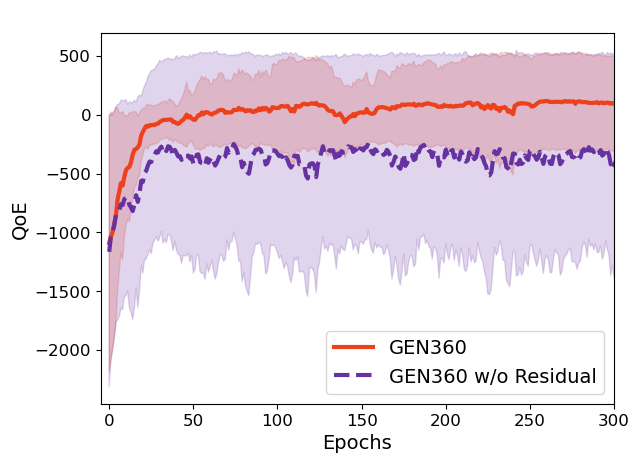

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def read_file(filename):
    data = [[0, -1089.3643798828125]]
    data = []
    with open(filename, 'r') as file:
        file.readline()
        for line in file.readlines():
            line = line.strip().split(',')
            data.append([int(line[-2]), float(line[-1])])
    return np.array(data)


gen360_path = 'gen360_wo_bc_wu2017_reward.csv'
gen360_std_path = 'gen360_wo_bc_wu2017_reward_std.csv'
gen360_wo_residual_path = 'gen360_wo_residual_wu2017_reward.csv'
gen360_wo_residual_std_path = 'gen360_wo_residual_wu2017_reward_std.csv'

# gen360_path = 'gen360_wo_bc_jin2022_reward.csv'
# gen360_std_path = 'gen360_wo_bc_jin2022_reward_std.csv'
# gen360_wo_residual_path = 'gen360_wo_residual_jin2022_reward.csv'
# gen360_wo_residual_std_path = 'gen360_wo_residual_jin2022_reward_std.csv'

gen360 = read_file(gen360_path)
gen360_std = read_file(gen360_std_path)
gen360_wo_residual = read_file(gen360_wo_residual_path)
gen360_wo_residual_std = read_file(gen360_wo_residual_std_path)

epoch_num = min(len(gen360), len(gen360_wo_residual))
plt.figure(figsize=(6.5, 4.5))
epoch_num = 800
lw = 3
gen360_color = '#ED411D'
alpha = 0.2
plt.fill_between(range(epoch_num), gen360[:epoch_num, 1] - gen360_std[:epoch_num, 1], gen360[:epoch_num, 1] + gen360_std[:epoch_num, 1], color=gen360_color, alpha=alpha)
plt.plot(range(epoch_num), gen360[:epoch_num, 1], label='GEN360', color=gen360_color, lw=lw, linestyle='-')
# plt.errorbar(range(epoch_num), gen360[:epoch_num, 1], yerr=gen360_std[:epoch_num, 1], label='GEN360', color='red')

gen360_wo_residual_color = '#6631A0'
# gen360_wo_residual_color = 'blue'
plt.fill_between(range(epoch_num), gen360_wo_residual[:epoch_num, 1] - gen360_wo_residual_std[:epoch_num, 1], gen360_wo_residual[:epoch_num, 1] + gen360_wo_residual_std[:epoch_num, 1], color=gen360_wo_residual_color, alpha=alpha)
plt.plot(range(epoch_num), gen360_wo_residual[:epoch_num, 1], label='GEN360 w/o Residual', color=gen360_wo_residual_color, lw=lw, linestyle='--')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('QoE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([-5, 300])
# plt.plot(with_bc[:epoch_num, 0], with_bc[:epoch_num, 1], label='GEN360', color='red')
# plt.plot(without_bc[:epoch_num, 0], without_bc[:epoch_num, 1], label='GEN360 w/o BC Init', color='blue')
# plt.xlabel('Steps')
plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()
plt.savefig(f"ablation_convergence_cmp.pdf", dpi=300, format="pdf")
plt.title('  ', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def read_file2(filename):
    data = []
    with open(filename, 'r') as file:
        file.readline()
        for line in file.readlines():
            line = line.strip().split(',')
            data.append([float(line[0]), float(line[1]), float(line[2]), float(line[3])])
    return np.array(data)


with_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe3/epochs_20_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results_case_study_uid_True.csv'
without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe3/epochs_20_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_True/results_case_study_uid_False.csv'
with_id = read_file2(with_id_path)
without_id = read_file2(without_id_path)
length = len(with_id)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
ax1.plot(range(length), with_id[:, -2], 'r-', label='GEN360')  
ax1.plot(range(length), without_id[:, -2], 'g-', label='GEN360 w/o RepL')  
ax2.plot(range(length), with_id[:, -1], 'r.', label='GEN360')  
ax2.plot(range(length), without_id[:, -1], 'g.', label='GEN360 w/o RepL')  
ax1.set_xlabel('Chunk ID')
ax1.set_ylabel('Rebuffering Time', color='g')
ax2.set_ylabel('Quality', color='b')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def moving_average(data, window_size=10):
    window = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, window, mode='same')
    return smoothed_data

def read_file2(filename):
    data = []
    with open(filename, 'r') as file:
        file.readline()
        for line in file.readlines():
            line = line.strip().split(',')
            data.append([float(line[0]), float(line[1]), float(line[2]), float(line[3])])
    return np.array(data)


# with_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe3/epochs_20_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_True/results_case_study_uid_True.csv'
# without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/unseen_qoe3/epochs_20_bs_256_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_True/results_case_study_uid_False.csv'
# with_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_True_v_2_u_25_t27_fqoe_1_7_1_sqoe_7_1_1.csv'
# without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_False_v_2_u_25_t27_fqoe_1_7_1_sqoe_7_1_1.csv'
# with_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_True_v_2_u_25_t27_fqoe_7_1_1_sqoe_1_7_1.csv'
# without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_False_v_2_u_25_t27_fqoe_7_1_1_sqoe_1_7_1.csv'
# with_id_path =  '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_True_v_2_u_25_t16_fqoe_1_7_1_sqoe_7_1_1.csv'
# without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_False_v_2_u_25_t16_fqoe_1_7_1_sqoe_7_1_1.csv'
# with_id_path =  '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_True_v_2_u_17_t16_fqoe_1_7_1_sqoe_7_1_1.csv'
# without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_False_v_2_u_17_t16_fqoe_1_7_1_sqoe_7_1_1.csv'
with_id_path =  '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_True_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_True_v_2_u_17_t23_fqoe_1_7_1_sqoe_7_1_1.csv'
without_id_path = '/data/wuduo/2023_omnidirectional_vs/results/bitrate_selection/gen360_3/Wu2017_4G/case_study/epochs_2000_bs_512_lr_0.0001_gamma_0.99_seed_1_ent_0.01_useid_False_lambda_0.5_ilr_0.0001_iur_2_bc_False/results_case_study_uid_False_v_2_u_17_t23_fqoe_1_7_1_sqoe_7_1_1.csv'



with_id = read_file2(with_id_path)
without_id = read_file2(without_id_path)
length = len(with_id)
fig, ax1 = plt.subplots(figsize=(6, 2))
# ax1.plot(range(length), with_id[:, -2], 'r-', label='GEN360')  
# ax1.plot(range(length), without_id[:, -2], 'g-', label='GEN360 w/o RepL')  
ax1.plot(range(length), moving_average(with_id[:, -2]), 'r-', label='GEN360')  
ax1.plot(range(length), moving_average(without_id[:, -2]), 'g-', label='GEN360 w/o RepL')  
ax1.set_xlabel('Chunk ID')
ax1.set_ylabel('Rebuffering Time')
ax1.legend(loc='upper left')
plt.show()
fig, ax2 = plt.subplots(figsize=(6, 2))
ax2.plot(range(length), moving_average(with_id[:, -3]), 'r-', label='GEN360')  
ax2.plot(range(length), moving_average(without_id[:, -3]), 'g-', label='GEN360 w/o RepL')  
ax2.set_xlabel('Chunk ID')
ax2.set_ylabel('Quality')
ax2.legend(loc='upper left')
plt.show()
fig, ax2 = plt.subplots(figsize=(6, 2))
ax2.plot(range(length), moving_average(with_id[:, 0]), 'r-', label='GEN360')  
ax2.plot(range(length), moving_average(without_id[:, 0]), 'g-', label='GEN360 w/o RepL')  
ax2.set_xlabel('Chunk ID')
ax2.set_ylabel('Quality')
ax2.legend(loc='upper left')
plt.show()